# Preliminary use case for Moisture Budgets
## Step 1. Monthly Mean Eddy Covariances from 6-hourly model output
documentation at end for now ...

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import os
%matplotlib inline
from dask.diagnostics import ProgressBar

In [2]:
# Uncomment next line for cheyenne:
#dir_base = '/glade/p/CMIP/CMIP5/output1/'
dir_base = './'

center = "NCAR"; model = "CCSM4"
scenario = "historical"
freq = "6hr"; realm = "atmos"; dtype = "6hrLev"

ddir = os.path.join(dir_base, center, model, scenario, freq, realm, dtype)
ddir

'./NCAR/CCSM4/historical/6hr/atmos/6hrLev'

In [3]:
from glob import glob

In [4]:
# grab all netCDF files for year=1960 recursively in this directory 
# N.B. this might not work well for models with multiple ensemble members

# pick one year for testing
all_files = glob(os.path.join(ddir, '**/*1960*.nc'), recursive=True)

# clean up the dataset, using the first file as a template
ds1 = xr.open_dataset(all_files[0])
ds1

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 192, lev: 26, lon: 288, time: 368)
Coordinates:
  * time      (time) datetime64[ns] 1960-10-01 1960-10-01T06:00:00 ...
  * lev       (lev) float64 0.9926 0.9706 0.9296 0.8672 0.7877 0.6968 0.6005 ...
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 11.25 ...
Dimensions without coordinates: bnds
Data variables:
    lev_bnds  (lev, bnds) float64 1.0 0.9851 0.9851 0.956 0.956 0.9033 ...
    p0        float32 1e+03
    a         (lev) float64 0.0 0.001261 0.004803 0.01021 0.0171 0.02497 ...
    b         (lev) float64 0.9926 0.9693 0.9248 0.8569 0.7706 0.6718 0.5672 ...
    ps        (time, lat, lon) float32 69760.6 69760.6 69760.6 69760.6 ...
    a_bnds    (lev, bnds) float64 0.0 0.0 0.0 0.002521 0.002521 0.007085 ...
    b_bnds    (lev, bnds) float64 1.0 0.9851 0.9851 0.9535 0.9535 0.8962 ...
    lat_bnds  (lat, bnds) float64 -90.0 -89.53 -89.5

In [5]:
# and a slick function (thanks @rabernat !) to turn all time-independent variables
# into coordinates so that open_mfdataset doesn't have to check for consistency 
def set_correct_coords(ds):
    coord_vars = [dvar for dvar in ds1 if not 'time' in ds1[dvar]]
    return ds.set_coords(coord_vars)

ds = xr.open_mfdataset(all_files, preprocess=set_correct_coords)
ds

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 192, lev: 26, lon: 288, time: 1460)
Coordinates:
  * time      (time) datetime64[ns] 1960-01-01 1960-01-01T06:00:00 ...
  * lev       (lev) float64 0.9926 0.9706 0.9296 0.8672 0.7877 0.6968 0.6005 ...
    lev_bnds  (lev, bnds) float64 1.0 0.9851 0.9851 0.956 0.956 0.9033 ...
    p0        float64 1e+03
    a         (lev) float64 0.0 0.001261 0.004803 0.01021 0.0171 0.02497 ...
    b         (lev) float64 0.9926 0.9693 0.9248 0.8569 0.7706 0.6718 0.5672 ...
    a_bnds    (lev, bnds) float64 0.0 0.0 0.0 0.002521 0.002521 0.007085 ...
    b_bnds    (lev, bnds) float64 1.0 0.9851 0.9851 0.9535 0.9535 0.8962 ...
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...
    lat_bnds  (lat, bnds) float64 -90.0 -89.53 -89.53 -88.59 -88.59 -87.64 ...
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 11.25 ...
    lon_bnds  (lon, bnds) float64 -0.625 0.625 0.625 1.875 1.875 3.125 3.125 ...
Dimensions without 

In [6]:
ds['qu'] = ds.hus * ds.ua
ds['qv'] = ds.hus * ds.va

#compute the monthly means from six-hourly means for all variables:
with ProgressBar():
    dsr = ds.resample(freq='MS', dim='time').load()
    
dsr

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 192, lev: 26, lon: 288, time: 12)
Coordinates:
  * lev       (lev) float64 0.9926 0.9706 0.9296 0.8672 0.7877 0.6968 0.6005 ...
    lev_bnds  (lev, bnds) float64 1.0 0.9851 0.9851 0.956 0.956 0.9033 ...
    a         (lev) float64 0.0 0.001261 0.004803 0.01021 0.0171 0.02497 ...
    b         (lev) float64 0.9926 0.9693 0.9248 0.8569 0.7706 0.6718 0.5672 ...
    a_bnds    (lev, bnds) float64 0.0 0.0 0.0 0.002521 0.002521 0.007085 ...
    b_bnds    (lev, bnds) float64 1.0 0.9851 0.9851 0.9535 0.9535 0.8962 ...
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...
    lat_bnds  (lat, bnds) float64 -90.0 -89.53 -89.53 -88.59 -88.59 -87.64 ...
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 11.25 ...
    lon_bnds  (lon, bnds) float64 -0.625 0.625 0.625 1.875 1.875 3.125 3.125 ...
  * time      (time) datetime64[ns] 1960-01-01 1960-02-01 1960-03-01 ...
Dimensions without coordinates: bnds
Data varia

In [7]:
# Finally, calculate the eddy covariances and add to Dataset
dsr['qpup'] = dsr.qu - dsr.hus * dsr.ua
dsr['qpvp'] = dsr.qv - dsr.hus * dsr.va

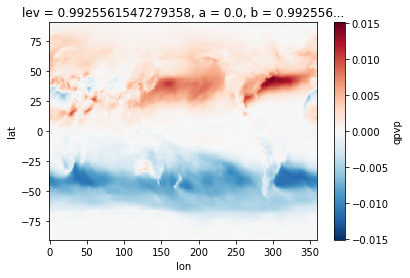

In [8]:
dsr.qpvp.isel(lev=0).mean(dim='time').plot()

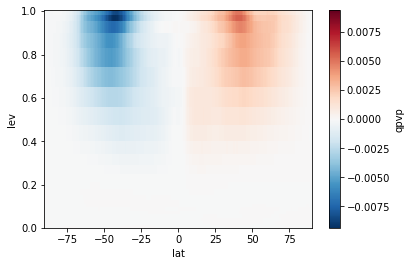

In [9]:
dsr.qpvp.mean(dim=('time', 'lon')).plot()

In [10]:
dsr.to_netcdf('./output/EddyCovar-'+model+'-'+scenario+'-1960.nc')

## Monthly Mean Eddy Covariances from 6-hourly model output

### PURPOSE: Calculate the monthly mean eddy covariances, U'Q' and V'Q'  from 6-hourly data

    U,V are 6-hourly (lon,lat,lev) wind data on model sigma levels
     Q   is 6-hourly specific humidity data on model sigma levels
 
### BACKGROUND: 
    The vertically integrated monthly mean atmospheric moisture 
    budgets provide an accounting for the physical processes leading 
    to the net surface water flux, E-P (Evaporation minus Precipitation).
    The physical processes can be time filtered in time into mean and 
    eddy terms and spatially into convergence and advection terms.  We 
    can also separate time anomalies and trends into those resulting 
    from changes in atmospheric moisture and those resulting from changes 
    in the atmospheric circulation.  This allows diagnostic evaluation
    of the physical mechanisms of hydroclimate variability and change.
    See:
    
    __Seager, R. and N. Henderson, 2013: Diagnostic computation of moisture 
    budgets in the ERA-Interim Reanalysis with reference to analysis of 
    CMIP-archived atmospheric model data. J. Climate, 26: 7876 - 7901__
    
    The most computationally expensive part of this calculation is the 
    calculation of the covariance terms, U*Q and V*Q since these quantities 
    are generally not included in the standard variables in the CMIP 
    archives.  Ideally they would be calculated for every time step of 
    the simulation. In the absence of these actual covariances, we must 
    compute an approximation from the 6-hourly model output that is standard 
    for CMIP.  Since most of the moisture is in the lower part of the 
    atmosphere where the topography plays a significant role, the horizontal 
    differencing and vertical integrals must be treated carefully.
    
    This is a test case for the calculation of the covariances using only 
    the NCAR/CCMS4 historical CMIP5 simulation. Only one ensemble member 
    is available, r6i1p1, but 1.5Tbytes of data must be processed to 
    calculate the monthly mean covariances.

### DATA USED: 
    The CMIP5-CCSM-historical test data is located on cheyenne.ncar.edu:
    
    /glade/p/CMIP/CMIP5/output1/NCAR/CCSM4/historical/6hr/atmos/6hrLev/r6i1p1/latest/
    
    There are two forms of the ua,va and hus fields available, one set 
    on the model sigma vertical grid and the other interpolated to a reduced 
    set of pressure levels. We use the pressure level data since most modeling 
    groups do not provide data on the native vertical grid, but NCAR/CCMS4 
    provides only U and V, Q is not available. I have submitted
    a request, but they are still 'Looking into it'.
    
    This particular model has 6-hourly data from 1950-2005 on 26 levels for 
    only one ensemble member. They provide 4 files per model year and each 
    file for each variable is 2.1G.  Thus the data to be processed is
    about 1.5Tb - just for the historical runs.

### METHOD:  for all levels,latitudes and longitudes, 
    calculate <U'*Q'> = <U*Q> - <U>*<Q>

### NOTATION:  

     U  = 6-hourly U data 
    <U> = monthly mean U 
     U' = U - <U>
        